# Quantifying Dynamic Risk Factors for Vehicular Crashes

## Motivation
Briefly state the nature of your project and why you chose it. What specific question or goal did you try to address?

- show risks of injury and deaths based on four common driver errors
- Calculate probabilites of accident while driving poorly.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import altair as alt
from altair import datum
import seaborn as sns
import scipy.stats as stats

## Data Sources
- where the datasets or API resources are located,
- what formats they returned/used,
- what were the important variables contained in them,
- how many records you used or retrieved (if using an API), and
- what time periods they covered (if there is a time element)

In [54]:
# Import data ##########################################################
df_vehicle = pd.read_csv("data/crss_2021_csv/vehicle.csv")
df_person = pd.read_csv("data/crss_2021_csv/person.csv")
df_accident = pd.read_csv("data/crss_2021_csv/accident.csv")

df_distract = pd.read_csv('data/crss_2021_csv/distract.csv')
df_impair = pd.read_csv('data/crss_2021_csv/drimpair.csv')

# Daniel's Topics: Fast driving, unbuckled driving
# Madeline's Topics: Impaired driving, distracted driving
# relate to accident type, injury, and damage
# indicators: SPEEDREL, VSPD_LIM, TRAV_SP, CASENUM
# TODO look at accident dataframe and generate basic statistics

## Cleaning and Manipulation

- How specifically did you need to manipulate the data?
- How did you handle missing, incomplete, or incorrect data?
- How did you perform conversion or processing steps?
- What variables and steps did you use to join the two data resources to perform your data analysis?
- What challenges did you encounter and how did you solve them?

In [55]:
# Data cleaning and manipulation #######################################

# Replace non-applicable codes with NaN
# for plotting purposes
replace_vals_trav_speed = {997: np.NaN, 998: np.NaN, 999: np.NaN}
replace_vals_speed_lim = {98: np.NaN, 99: np.NaN}
replace_vals_age = {998: np.NaN, 999: np.NaN}

df_vehicle["TRAV_SP_1"] = df_vehicle["TRAV_SP"].replace(replace_vals_trav_speed)
df_vehicle["VSPD_LIM_1"] = df_vehicle["VSPD_LIM"].replace(replace_vals_speed_lim)
df_person["AGE_1"] = df_person["AGE"].replace(replace_vals_age)

# Merge vehicle and person df by CASENUM
df_merged = df_vehicle.merge(df_person, how="outer", on="CASENUM")
# Merge accident df by CASENUM
df_merged = df_merged.merge(df_accident, how="outer", on="CASENUM")

# Bin travel_speed
bins = np.arange(0, 105, 5)
bin_labels = np.arange(0, 105, 5)[1:]
df_merged["TRAV_SP_1_bins"] = pd.cut(
    df_merged["TRAV_SP_1"], bins=bins, labels=bin_labels
)

# TODO filter based on speed related crashes? df_vehicle['SPEEDREL']

In [12]:
# TODO addressed unknown values with imputed
# df_merged[['INJ_SEV','INJSEV_IM']].head(50)

Define imputed values. 
Impact of using imputed values p.141
Percentages of Unknown and Not Reported Values p.14

Used Indicators:

    1. TRAV_SP
        - TRAV_SP_1
        - TRAV_SP_1_bins

    2. VSPD_LIM
        - VSPD_LIM_1
        
    3. INJ_SEVNAME
        - (INJSEV_IM)

    4. EJECTIONNAME
        - (EJECTTION, EJECT_IM)
    
    5. REST_USENAME

## Problem Identification and General Statistics

show general statistics and trends in data
	age
	injuries
	death
	damage

car crash injury severity based on vehicle age, make, model, build

Probability based on relative incidences 
- Exmaple: 65 mph speed limiit 5x greater deaths than 40 mph speed limit


In [13]:

def create_states_id_for_altair_geograph(input_str):

    # create dictionary to map ids to state
    # required to use altiar map api

    import re
    regex_states = re.compile(r'[A-Z]{2}')
    states_id = regex_states.findall(input_str)

    replace_dict = {
        'AL': 1, 'AK': 2, 'AZ': 4, 'AR':5, 'CA': 6, 'CO': 8, 'CT': 9, 'DE': 10, 'DC':11,
        'FL': 12, 'GA': 13, 'HI':15, 'ID':16, 'IL':17, 'IN': 18, 'IA':19, 'KS':20, 'KY':21,
        'LA':22, 'ME':23, 'MD':24, 'MA':25, 'MI':26, 'MN':27, 'MS':28, 'MO':29, 'MT':30,
        'NE':31, 'NV':32, 'NH':33, 'NJ':34, 'NM':35, 'NY':36, 'NC':37, 'ND':38, 'OH':39,
        'OK':40, 'OR':41, 'PA':42, 'RI':44, 'SC':45, 'SD':46, 'TN':47, 'TX':48, 'UT':49,
        'VT':50, 'VA':51, 'WA':53, 'WV':54, 'WI':55, 'WY':56
    }

    # replace state with id per altiar api
    for idx, state in enumerate(states_id):
        if state in replace_dict:
            states_id[idx] = state.replace(state, str(replace_dict[state]))
        else:
            pass

    # convert str out to int for altair api
    states_id_list = [int(float(x)) for x in states_id]

    return states_id_list

create_states_id_for_altair_geograph('South (MD, DE, DC, WV, VA, KY, TN, NC, SC,')

[24, 10, 11, 54, 51, 21, 47, 37, 45]

In [14]:
# states point at 'id' column
    # 1-Alabama, 2-Alaska, etc

# group 'id' to REGION column 


# create 'id' column
# create 'crash' column
# take REGION column and explode to 'id', make 'crash' for each equal to 1
# create 'crash_percent' column
# evaulate percent 'crash'  based on region

encoding = []

data = {'region':df_merged['REGIONNAME_x'].dropna()}
df_map = pd.DataFrame(data)


# df_map['id'] = 

# remove string, convert to list with state numbers


df_map['accident_count'] = df_map.apply(lambda x: 1, result_type='broadcast')

df_map['id'] = df_map['region'].apply(lambda x: create_states_id_for_altair_geograph(str(x)))

df_map = df_map.explode('id')

df_map = df_map.groupby('id').sum()

region_sum = sum(df_map['accident_count'].unique())

df_map['accident_percent'] = df_map['accident_count'] / region_sum * 100

df_map.reset_index(inplace=True)

In [15]:
map_vals = df_map['accident_percent'].unique()

print("South: ", map_vals[0])
print("Midwest: ", map_vals[3])
print("West: ", map_vals[1])
print("Northeast: ", map_vals[2])


South:  78.92741061755146
Midwest:  15.492957746478872
West:  4.604550379198267
Northeast:  0.9750812567713976


In [30]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'states')
# source = data.population_engineers_hurricanes.url
source = df_map

alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('accident_percent:Q', title='Crash %')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['accident_percent'])
).project(
    type='albersUsa'
).properties(
    width=700,
    height=500
)

alt.Chart(...)

In [ ]:
# # 🚗

# catdog = pd.DataFrame({
#     'FSA': ['M1X', 'M5G', 'M4H', 'M5C', 'M5H'],
#     'PropDogs': [76.35, 63.36,54.76, 20.10, 10.5]
# })
# catdog

# catdog['PropCats']=100-catdog['PropDogs']
# catdog=catdog.melt(id_vars ='FSA')
# catdog

# # transform scale of value to 1-10
# catdog['value']=(catdog['value']/10)
# # add emoji column
# catdog['emoji'] =[{'PropCats': '🐈', 'PropDogs': '🐕'}[animal] *int(value) for animal,value in catdog[['variable','value']].values ]
# catdog.head()

# alt.Chart(catdog).mark_text(align='left').encode(
#     alt.X('value:O', axis=alt.Axis(format='.0%'),scale=alt.Scale(range=[0,100])),
#     alt.Y('variable:O', axis=None),
#     alt.Row('FSA:N', header=alt.Header(title='')),
#     alt.SizeValue(60),
#     text='emoji'
# ).properties(width=800, height=200
# ).transform_calculate(
#    value='0'


In [ ]:
def bar_accident_region(df):

    columns = ['REGIONNAME']
    df = df[columns]
    # Normalize percent of accidents based on REGIONNAME, intersection type
    bar = alt.Chart(df, title='Percent of Accidents based on region name').transform_aggregate(
        count='count()',
        groupby=['REGIONNAME']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('REGIONNAME:N'),
        y=alt.Y('frac:Q', title='Region',axis=alt.Axis(format='%')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)
    return bar

bar_accident_region(df_merged)

alt.Chart(...)

In [ ]:
def bar_injury_sev(df):

    columns = ['INJSEV_IMNAME']
    df = df[columns]

    # Normalize percent of accidents based on INJURY
    bar = alt.Chart(df, title='Percent of Accidents based on Injury').transform_aggregate(
        count='count()',
        groupby=['INJSEV_IMNAME']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('INJSEV_IMNAME:N'),
        y=alt.Y('frac:Q', title='Percent of Accidents',axis=alt.Axis(format='%')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)
    return bar

bar_injury_sev(df_merged)

alt.Chart(...)

In [ ]:
def bar_intersection_type(df):

    columns = ['TYP_INTNAME']
    df = df[columns]

    # Normalize percent of accidents based on TYP_INTNAME, intersection type
    bar = alt.Chart(df, title='Percent of Accidents based on intersection').transform_aggregate(
        count='count()',
        groupby=['TYP_INTNAME']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('TYP_INTNAME:N'),
        y=alt.Y('frac:Q', title='Intersection Type',axis=alt.Axis(format='%')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)
    return bar

bar_intersection_type(df_merged)

alt.Chart(...)

In [ ]:
def bar_harmful_event(df):

    columns = ['HARM_EVNAME']
    df = df[columns]

    # Normalize percent of accidents based on HARM_EVNAME, intersection type
    bar = alt.Chart(df, title='Percent of Accidents based on harmful event').transform_aggregate(
        count='count()',
        groupby=['HARM_EVNAME']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('HARM_EVNAME:N'),
        y=alt.Y('frac:Q', title='Harmful Event',axis=alt.Axis(format='%'), scale=alt.Scale(type='log')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)

    return bar

bar_harmful_event(df_merged)

alt.Chart(...)

In [ ]:
def bar_accidents_and_junctions(df):

    columns = ['RELJCT2_IMNAME']
    df = df[columns]

    # Normalize percent of accidents based on RELJCT2_IMNAME, relation to junction, specific name
    bar = alt.Chart(df, title='Percent of Accidents based relation to junction').transform_aggregate(
        count='count()',
        groupby=['RELJCT2_IMNAME']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('RELJCT2_IMNAME:N'),
        y=alt.Y('frac:Q', title='Relation to Junction',axis=alt.Axis(format='%')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)
    return bar

bar_accidents_and_junctions(df_merged)

alt.Chart(...)

## The Fast Driver Profile

All visualizations referenced and explained in the text. Visualizations are complete, including appropriate title, axis labels, etc. Visualizations are annotated appropriately (note: not all visualizations need annotations).

In [ ]:
# travel speed vs speed limit ########################################################################
def point_plot(df):

    # Reduce size of dataframe by only including relevant columns
    columns=['TRAV_SP_1_bins', 'VSPD_LIM_1']
    df = df[columns]

    bars = alt.Chart(df).mark_point().encode(
    y=alt.Y('TRAV_SP_1_bins:Q',  axis=alt.Axis(values=list(range(0, 100, 5))), title='Driver Speed'),
    x=alt.X('VSPD_LIM_1:Q', axis=alt.Axis(values=list(range(0, 100, 5))), title='Speed Limit'),
    size=alt.Size('TRAV_SP_1_bins', aggregate='count')
    ).properties(
        width=300,
        height=300
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return bars
        
point_plot(df_merged)

alt.Chart(...)

In [ ]:
def heatmap_plot(df):
    
    # Reduce size of dataframe by only including relevant columns
    columns=['TRAV_SP_1', 'VSPD_LIM_1', 'TRAV_SP_1_bins']
    df = df[columns]

    heatmap = alt.Chart(df).mark_rect().encode(
        alt.Y('TRAV_SP_1:Q', title='Driver Speed').bin(maxbins=20),
        alt.X('VSPD_LIM_1:Q', title='Speed Limit').bin(maxbins=20),
        alt.Color('count():Q').scale(scheme='greenblue')
    ).transform_filter(
        (datum.TRAV_SP_1_bins <= 80)# & (datum.sex == 1)
    ).properties(
        width=300,
        height=300
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return heatmap

heatmap_plot(df_merged)

alt.Chart(...)

In [ ]:
# INJSEV_IM
# TODO use pandas cut,
# TODO pandas groupby, plot travel speed vs count(INJ_SEV),

# 0 No Apparent Injury (O)
# 1 Possible Injury (C)
# 2 Suspected Minor Injury (B)
# 3 Suspected Serious Injury (A)
# 4 Fatal Injury (K)
# 5 Injured, Severity Unknown (U)
# 6 Died Prior to Crash
# 9 Unknown/Not Reported

def point_plot_1(df):

    # Reduce size of dataframe by only including relevant columns
    columns=['TRAV_SP_1_bins', 'INJ_SEVNAME']
    df = df[columns]
    bars = alt.Chart(df).mark_point().encode(
        x=alt.X('TRAV_SP_1_bins:Q',  axis=alt.Axis(values=list(range(0, 100, 5))), title='Driver Speed'),
        y=alt.Y('INJ_SEVNAME:N', title='Injury Severity'),
        size=alt.Size('TRAV_SP_1_bins', aggregate='count')
    ).properties(
        width=500,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return bars

point_plot_1(df_merged)

alt.Chart(...)

In [ ]:
def injury_speed_dist_plot(df):
    
    # Reduce size of dataframe by only including relevant columns
    columns=['VSPD_LIM_1', 'INJ_SEVNAME', 'TRAV_SP_1']
    df = df[columns]

    speed_limit = alt.Chart(df).mark_area().encode(
        x=alt.X('VSPD_LIM_1:Q', title='Speed Limit (mph)'),
        y=alt.Y('count(VSPD_LIM_1):Q', title="",scale=alt.Scale(domain=[0,200])).scale(type="log"),
        color=alt.Color('INJ_SEVNAME:N', legend=None, title=''),
        row=alt.Row('INJ_SEVNAME:N',header=alt.Header(labelAngle=0, labelAlign='left'),title='COUNT') #.sort(['MSFT', 'AAPL', 'IBM', 'AMZN'])
    ).transform_filter(
        (datum.INJ_SEVNAME == 'No Apparent Injury (O)') | (datum.INJ_SEVNAME == 'Suspected Minor Injury (B)') |
        (datum.INJ_SEVNAME == 'Suspected Serious Injury (A)') | (datum.INJ_SEVNAME == 'Fatal Injury (K)') |
        (datum.INJ_SEVNAME == 'Unknown/Not Reported') | (datum.INJ_SEVNAME == 'Possible Injury (C)')

    ).properties(height=60, width=400
    )

    driver_speed = alt.Chart(df).mark_area().encode(
        x=alt.X('TRAV_SP_1:Q', title='Driver Speed (mph)'),
        y=alt.Y('count(TRAV_SP_1):Q', title="",scale=alt.Scale(domain=[0,200])).scale(type="log"),
        color=alt.Color('INJ_SEVNAME:N', legend=None, title=''),
        row=alt.Row('INJ_SEVNAME:N',header=None,title='') #.sort(['MSFT', 'AAPL', 'IBM', 'AMZN'])
    ).transform_filter(
        (datum.INJ_SEVNAME == 'No Apparent Injury (O)') | (datum.INJ_SEVNAME == 'Suspected Minor Injury (B)') |
        (datum.INJ_SEVNAME == 'Suspected Serious Injury (A)') | (datum.INJ_SEVNAME == 'Fatal Injury (K)') |
        (datum.INJ_SEVNAME == 'Unknown/Not Reported') | (datum.INJ_SEVNAME == 'Possible Injury (C)')

    ).properties(height=60, width=400
    )

    combined = (speed_limit | driver_speed).configure_axis(
        labelFontSize=12,
        titleFontSize=12
    )
    return combined

injury_speed_dist_plot(df_merged)

alt.HConcatChart(...)

In [ ]:
def bar_driver_speed_dist(df):

    # Reduce size of dataframe by only including relevant columns
    columns=['TRAV_SP_1']
    df = df[columns]

    # Normalize percent of accidents based on driver speed
    bar = alt.Chart(df, title='Percent of Accidents based on Driver Speed').transform_aggregate(
        count='count()',
        groupby=['TRAV_SP_1']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('TRAV_SP_1:Q'),
        y=alt.Y('frac:Q', title='Percent of Accidents',axis=alt.Axis(format='%')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)
    return bar

bar_driver_speed_dist(df_merged)

alt.Chart(...)

In [ ]:
def bar_speed_lim_dist(df):

    # Reduce size of dataframe by only including relevant columns
    columns=['VSPD_LIM_1']
    df = df[columns]

    # Normalize percent of accidents based on speed limit
    bar = alt.Chart(df, title='Percent of Accidents based on Speed Limit').transform_aggregate(
        count='count()',
        groupby=['VSPD_LIM_1']
    ).transform_joinaggregate(
        total='sum(count)'
    ).transform_calculate(
        frac='datum.count / datum.total'
    ).mark_bar(size=10).encode(
        x=alt.X('VSPD_LIM_1:Q'),
        y=alt.Y('frac:Q', title='Percent of Accidents',axis=alt.Axis(format='%')),
    ).properties(
        width=1000,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)
    return bar

bar_speed_lim_dist(df_merged)

alt.Chart(...)

In [ ]:


def bars_injury_types_speed_lim(df):

    columns = ['VSPD_LIM_1', 'INJSEV_IMNAME']
    df = df[columns]

    #risk per speed limit
    height= 200
    width = 1000

    fatal = alt.Chart(df, title='Driver Fatalities vs Speed Limit').mark_bar(size=10).encode(
        x=alt.X('VSPD_LIM_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(INJSEV_IMNAME)', title='Frequency of Fatalities'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Fatal Injury (K)')
    ).properties(
        width=width,
        height=height
    )

    severe = alt.Chart(df, title='Severe Injury vs Speed Limit').mark_bar(size=10).encode(
        x=alt.X('VSPD_LIM_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(INJSEV_IMNAME)', title='Frequency of Severe Injuries'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Suspected Serious Injury (A)')
    ).properties(
        width=width,
        height=height
    )

    minor = alt.Chart(df, title='Minor Injury vs Speed Limit').mark_bar(size=10).encode(
        x=alt.X('VSPD_LIM_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(INJSEV_IMNAME)', title='Frequency of Minor Injuries'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Suspected Minor Injury (B)')
    ).properties(
        width=width,
        height=height
    )

    injury = alt.Chart(df, title='Injury vs Speed Limit').mark_bar(size=10).encode(
        x=alt.X('VSPD_LIM_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(INJSEV_IMNAME)', title='Frequency of Injury'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Possible Injury (C)')
    ).properties(
        width=width,
        height=height
    )

    no = alt.Chart(df, title='No Injury vs Speed Limit').mark_bar(size=10).encode(
        x=alt.X('VSPD_LIM_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(INJSEV_IMNAME)', title='Frequency of No Injury'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'No Apparent Injury (O)')
    ).properties(
        width=width,
        height=height
    )

    combined = (fatal & severe & minor & injury).resolve_scale(
        x='shared'
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)

    return combined

bars_injury_types_speed_lim(df_merged)

alt.VConcatChart(...)

In [ ]:

def bars_injury_types_driver_speed(df):

    columns = ['TRAV_SP_1', 'INJSEV_IMNAME']
    df = df[columns]

    # risk per driver speed
    height= 200
    width = 1000

    fatal = alt.Chart(df, title='Driver Fatalities vs Driver Speed').mark_bar(size=10).encode(
        x=alt.X('TRAV_SP_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(TRAV_SP_1)', title='Frequency of Fatalities'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Fatal Injury (K)')
    ).properties(
        width=width,
        height=height
    )

    severe = alt.Chart(df, title='Severe Injury vs Driver Speed').mark_bar(size=10).encode(
        x=alt.X('TRAV_SP_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(TRAV_SP_1)', title='Frequency of Severe Injuries'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Suspected Serious Injury (A)')
    ).properties(
        width=width,
        height=height
    )

    minor = alt.Chart(df, title='Minor Injury vs Driver Speed').mark_bar(size=10).encode(
        x=alt.X('TRAV_SP_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(TRAV_SP_1)', title='Frequency of Minor Injuries'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Suspected Minor Injury (B)')
    ).properties(
        width=width,
        height=height
    )

    injury = alt.Chart(df, title='Injury vs Driver Speed').mark_bar(size=10).encode(
        x=alt.X('TRAV_SP_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(TRAV_SP_1)', title='Frequency of Injury'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'Possible Injury (C)')
    ).properties(
        width=width,
        height=height
    )

    no = alt.Chart(df, title='No Injury vs Driver Speed').mark_bar(size=10).encode(
        x=alt.X('TRAV_SP_1',title='Speed Limit', axis=alt.Axis(values=np.arange(5,75,5))), #INJSEV_IMNAME
        y=alt.Y('count(TRAV_SP_1)', title='Frequency of No Injury'),
    ).transform_filter(
        (datum.INJSEV_IMNAME == 'No Apparent Injury (O)')
    ).properties(
        width=width,
        height=height
    )

    combined = (fatal & severe & minor & injury).resolve_scale(
        x='shared'
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    ).configure_title(fontSize=24)

    return combined

bars_injury_types_driver_speed(df_merged)

alt.VConcatChart(...)

In [ ]:
def circle_speed_lim_driver_speed(df):

    columns = ['TRAV_SP_1', 'VSPD_LIM_1', 'INJ_SEVNAME','AGE_1']
    df = df[columns]

    circle = alt.Chart(df).mark_circle().encode(
        alt.X('TRAV_SP_1').scale(zero=False),
        alt.Y('VSPD_LIM_1').scale(zero=False, padding=1),
        color='INJ_SEVNAME',
        size='AGE_1'
    ).properties(
        width=500,
        height=500
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )

    return circle

circle_speed_lim_driver_speed(df_merged)

alt.Chart(...)

## The Unbuckled Driver Profile

In [ ]:
def bar_ejection(df):

    # Ejected EJECTIONNAME
    # Seatbelt REST_USENAME
    # travel speed TRAV_SP_1_bins
    # injury severity INJ_SEVNAME

    columns = ['EJECTIONNAME']
    df = df[columns]

    bar = alt.Chart(df).mark_bar().encode(
        x=alt.X('count(EJECTIONNAME):Q'),
        y=alt.Y('EJECTIONNAME:N', title='Ejection'),
    ).properties(
        width=1000,
        height=200
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return bar

bar_ejection(df_merged)

alt.Chart(...)

In [ ]:
def circle_ejection(df):

    columns = ['REST_USENAME', 'EJECT_IMNAME']
    df = df[columns]

    circle = alt.Chart(df).mark_circle().encode(
        x=alt.X('REST_USENAME:N'),
        y=alt.Y('EJECT_IMNAME:N', title='Ejection'),
        # size=alt.Size('count(EJECT_IMNAME)')
    ).properties(
        width=1000,
        height=200
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return circle

circle_ejection(df_merged)

alt.Chart(...)

In [ ]:
def circle_injury_ejection(df):

    columns = ['EJECTIONNAME', 'INJ_SEVNAME']
    df = df[columns]

    circle = alt.Chart(df).mark_circle().encode(
        x=alt.X('EJECTIONNAME:N'),
        y=alt.Y('INJ_SEVNAME:N', title='Ejection vs Injury Severity'),
        size=alt.Size('count(INJ_SEVNAME)')
    ).properties(
        width=1000,
        height=200
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return circle

circle_injury_ejection(df_merged)

alt.Chart(...)

In [ ]:
def circle_driver_speed_ejection(df):

    columns = ['TRAV_SP_1', 'EJECTIONNAME']
    df = df[columns]

    circle = alt.Chart(df).mark_circle().encode(
        x=alt.X('TRAV_SP_1:Q'),
        y=alt.Y('EJECTIONNAME:N', title='Ejection vs Driver speed')
    ).properties(
        width=1000,
        height=200
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=14
    )
    return circle

circle_driver_speed_ejection(df_merged)


alt.Chart(...)

## The Impaired Driver Profile

##### First doing some data exploration into all impaired driving situations.

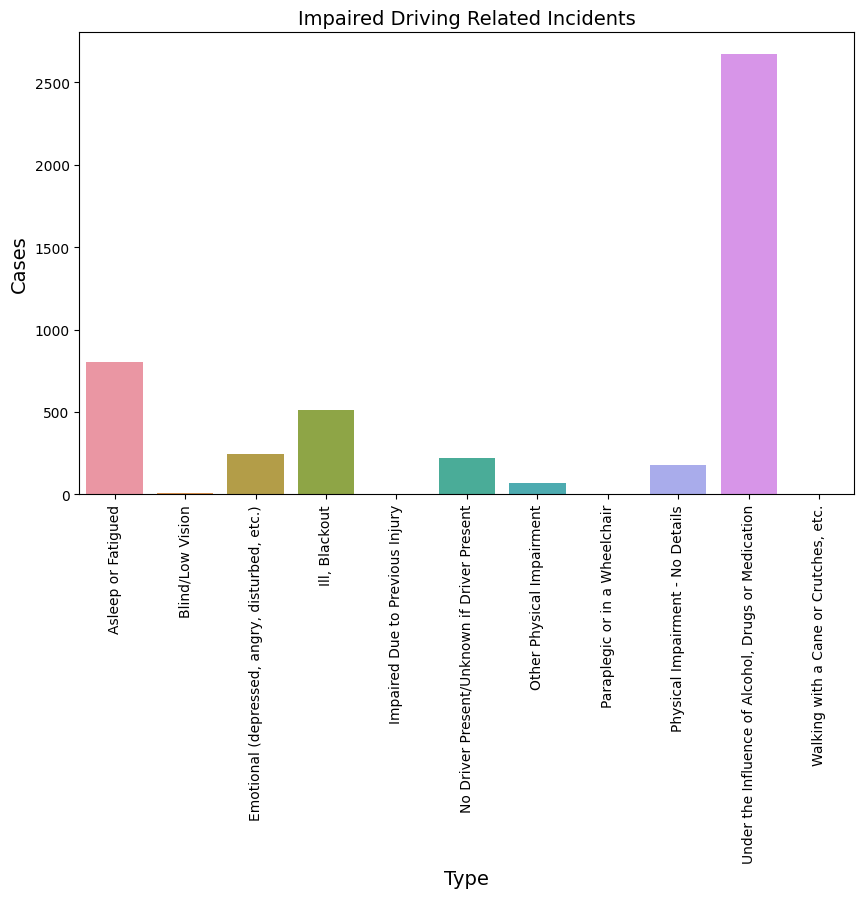

In [56]:
df_impair_group = df_impair.groupby('DRIMPAIRNAME').count().reset_index()
df_impair_group = df_impair_group.drop([6, 7, 11])

plt.figure(figsize=(10, 6))
gfg = sns.barplot(x="DRIMPAIRNAME", y="CASENUM", data=df_impair_group)
gfg.set_title("Impaired Driving Related Incidents", fontsize=14)
gfg.set_xlabel("Type", fontsize=14)
gfg.set_xticklabels(gfg.get_xticklabels(),rotation=90)
gfg.set_ylabel("Cases", fontsize=14)

plt.show()

##### Under the influece of Alcohol is by far the highest, so I will look further into alcohol related incidents when driving

In [58]:

def barchart_alc_incidents(column_name, order_list=[]):
    df = df_accident[df_accident['ALCHL_IM'] != 2.0]
    df = df.groupby(column_name).count().reset_index()
    

    mapping = {x: i for i, x in enumerate(order_list)}
    key = df[column_name].map(mapping)
    df = df.iloc[key.argsort()]
    
    plt.figure(figsize=(10, 6))
    gfg = sns.barplot(x=column_name, y="CASENUM", data=df)
    gfg.set_title("Alcohol Related Incidents", fontsize=14)
    gfg.set_xticklabels(gfg.get_xticklabels(),rotation=90)
    gfg.set_ylabel("Cases", fontsize=14)
    return plt.show()

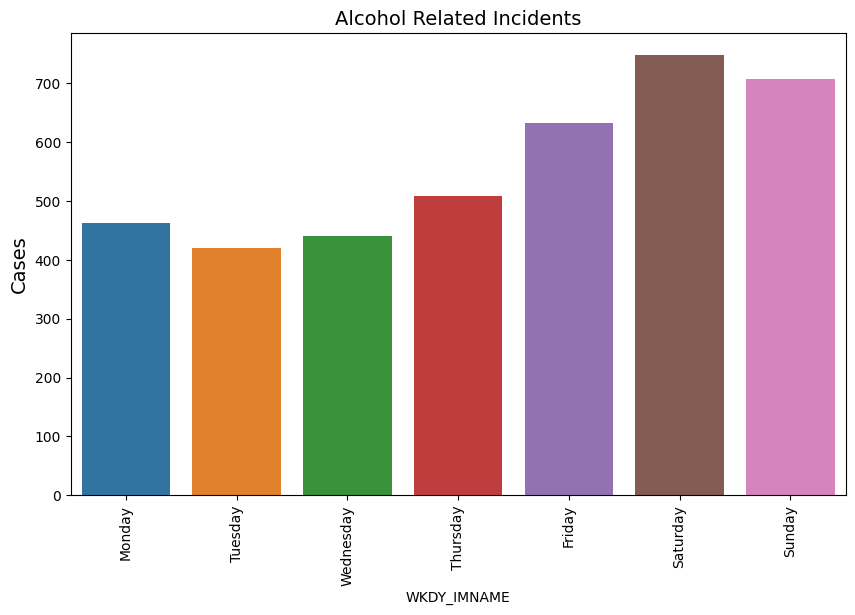

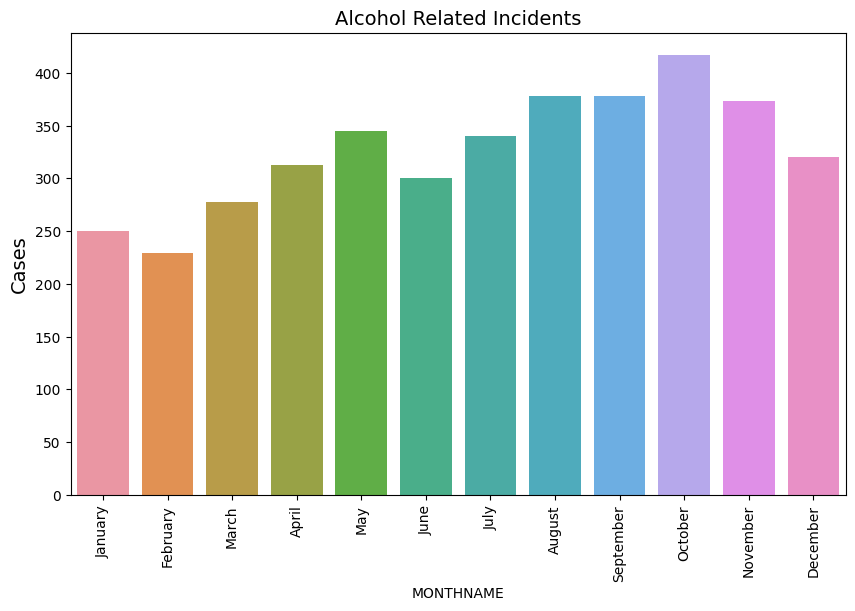

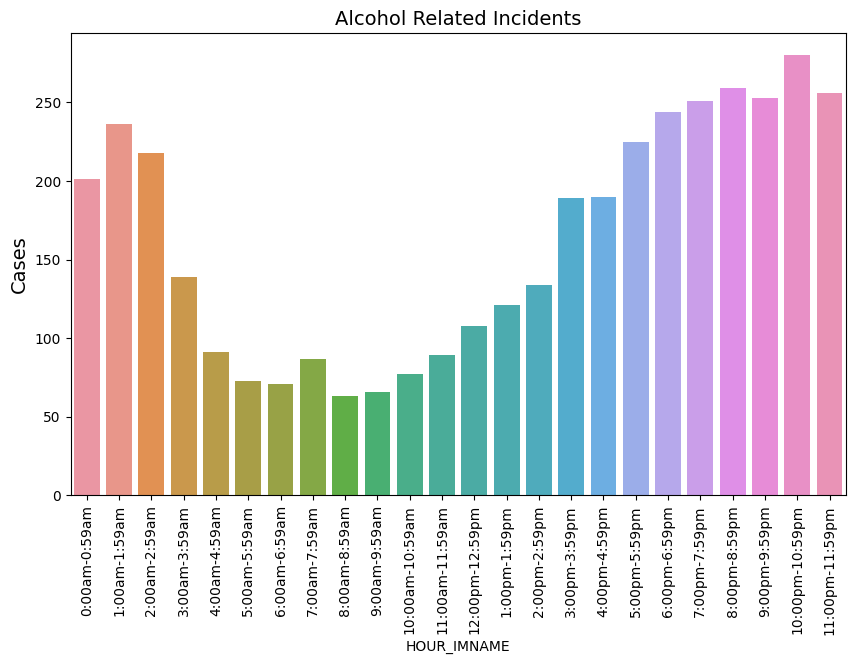

In [59]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hours = ['0:00am-0:59am', '1:00am-1:59am', '2:00am-2:59am', '3:00am-3:59am', '4:00am-4:59am', '5:00am-5:59am', '6:00am-6:59am', '7:00am-7:59am', '8:00am-8:59am', '9:00am-9:59am', '10:00am-10:59am', '11:00am-11:59am', '12:00pm-12:59pm', '1:00pm-1:59pm', '2:00pm-2:59pm', '3:00pm-3:59pm', '4:00pm-4:59pm', '5:00pm-5:59pm', '6:00pm-6:59pm', '7:00pm-7:59pm', '8:00pm-8:59pm', '9:00pm-9:59pm', '10:00pm-10:59pm', '11:00pm-11:59pm'] 


barchart_alc_incidents('WKDY_IMNAME', weekdays)
barchart_alc_incidents('MONTHNAME', months)
barchart_alc_incidents('HOUR_IMNAME', hours)

#### We also want to see what types of injuries are seen in these alcohol related incidents. 

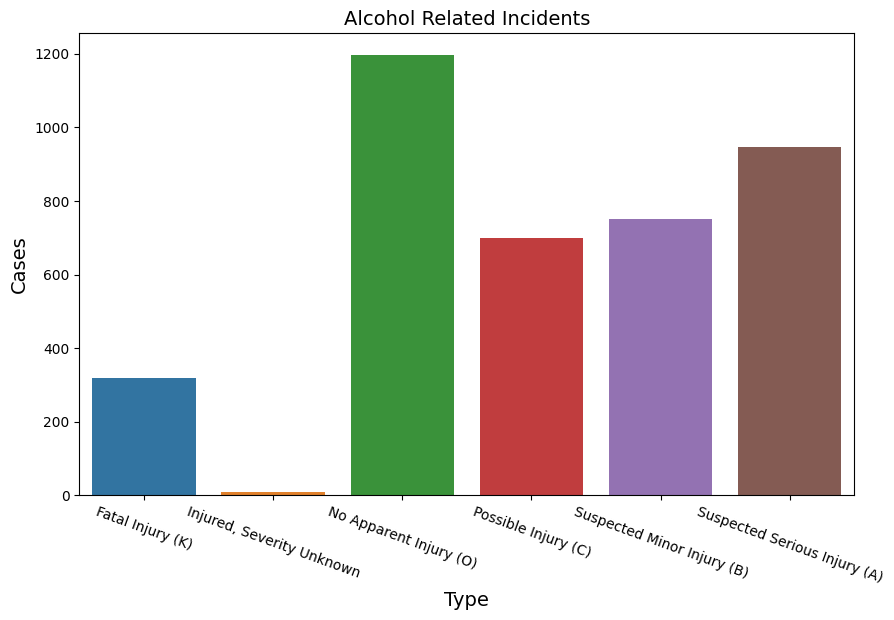

In [62]:
df_accident_alc = df_accident[df_accident['ALCHL_IM'] != 2.0]
df_accident_alc = df_accident_alc.groupby('MAXSEV_IMNAME').count().reset_index()

plt.figure(figsize=(10, 6))
gfg = sns.barplot(x="MAXSEV_IMNAME", y="CASENUM", data=df_accident_alc)
gfg.set_title("Alcohol Related Incidents", fontsize=14)
gfg.set_xlabel("Type", fontsize=14)
gfg.set_xticklabels(gfg.get_xticklabels(),rotation=-20)
gfg.set_ylabel("Cases", fontsize=14)

plt.show()

## Distracted Driving Profile

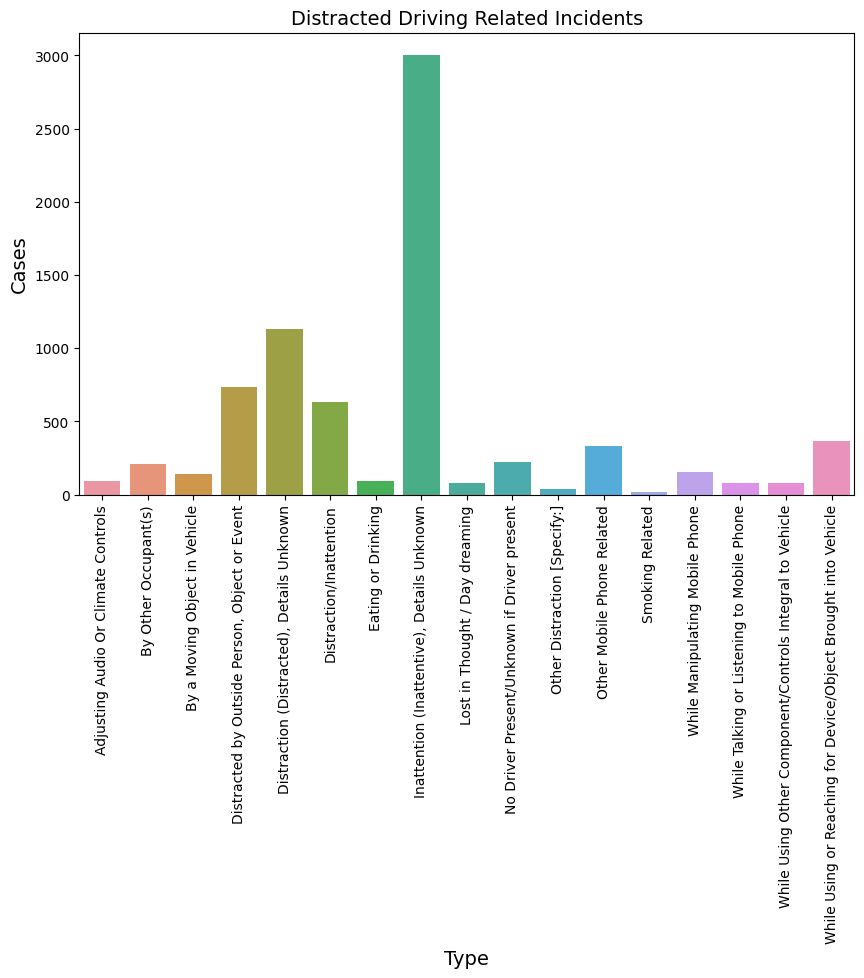

In [65]:
df_distract_grouped = df_distract.groupby('DRDISTRACTNAME').count().reset_index()
df_distract_grouped = df_distract_grouped.drop([10, 11, 14])

plt.figure(figsize=(10, 6))
gfg = sns.barplot(x="DRDISTRACTNAME", y="CASENUM", data=df_distract_grouped)
gfg.set_title("Distracted Driving Related Incidents", fontsize=14)
gfg.set_xlabel("Type", fontsize=14)
gfg.set_xticklabels(gfg.get_xticklabels(),rotation=90)
gfg.set_ylabel("Cases", fontsize=14)

plt.show()

In [69]:
def barchart_distracted_incidents(column_name, order_list=[]):
    df = pd.merge(df_distract, df_accident)
    df = df.groupby(column_name).count().reset_index()
    
    mapping = {x: i for i, x in enumerate(order_list)}
    key = df[column_name].map(mapping)
    df = df.iloc[key.argsort()]
    
    plt.figure(figsize=(10, 6))
    gfg = sns.barplot(x=column_name, y="CASENUM", data=df)
    gfg.set_title("Distracted Driving Related Incidents", fontsize=14)
    gfg.set_xticklabels(gfg.get_xticklabels(),rotation=90)
    gfg.set_ylabel("Cases", fontsize=14)

    return plt.show()

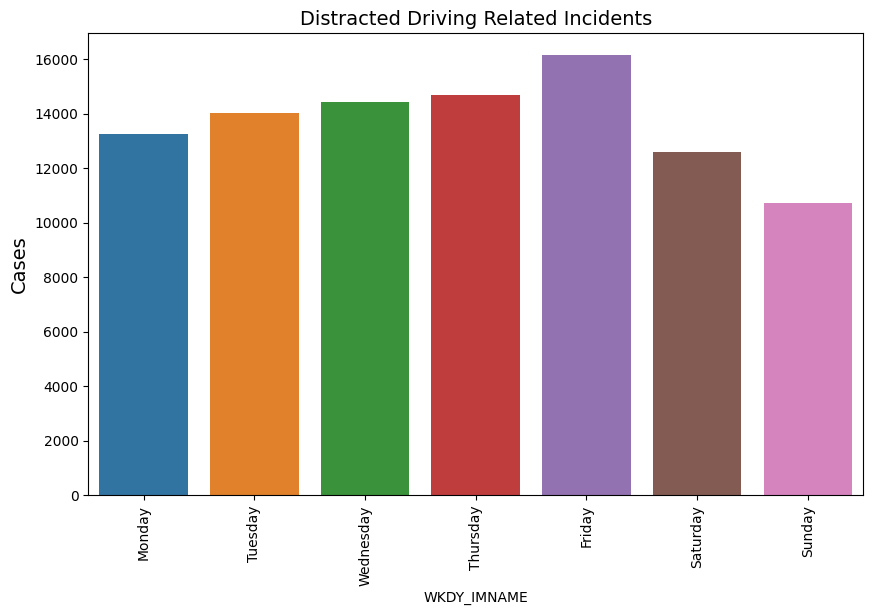

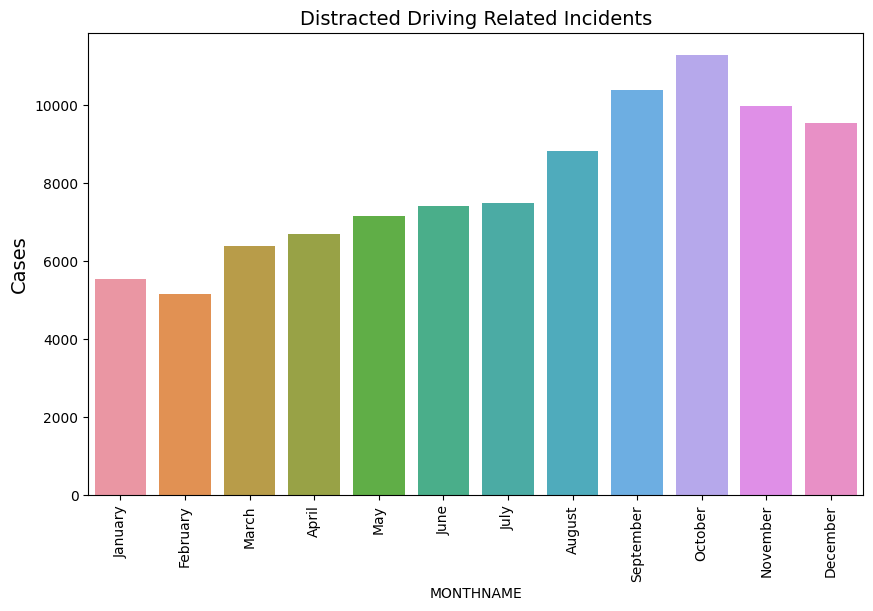

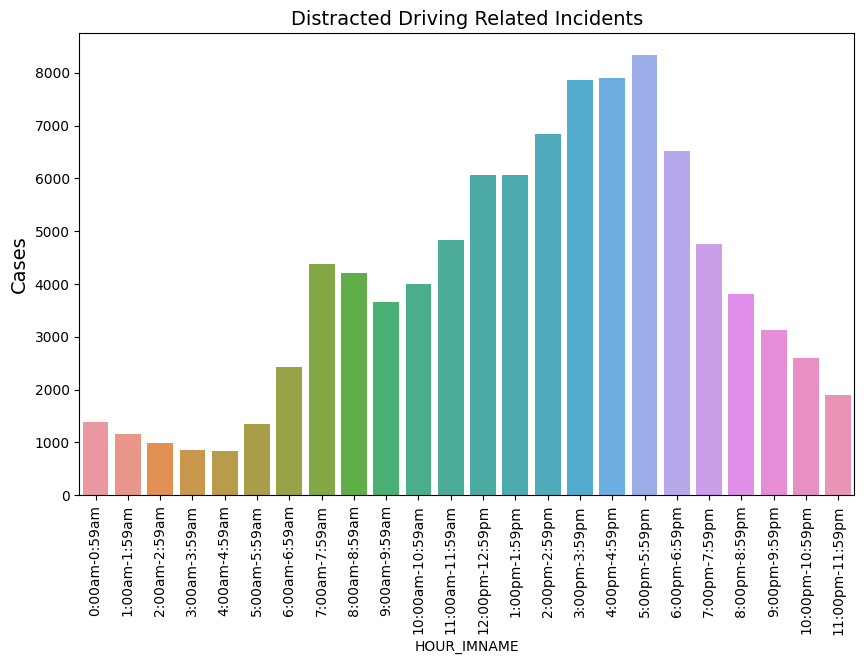

In [70]:
barchart_distracted_incidents('WKDY_IMNAME', weekdays)
barchart_distracted_incidents('MONTHNAME', months)
barchart_distracted_incidents('HOUR_IMNAME', hours)

## Analysis

A key goal of this project is bringing together two different data resources to answer an interesting question or find a new insight that could not have been answered with either data resource alone (which you summarized in the previous section). 

- What interesting relationships or insights did you get from your analysis?
- What didn’t work, and why?

In [ ]:
# correlation coefficients

# damage assessment 

# show location of damage for speeders 
# bucklers and non bucklers

# ADVISORIES 

# NMCC
# non motorist contributing circumstances

# weather

# visibility